# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, Thursday 24th April 2020</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own explanatory comment in this cell.
4. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

In [147]:
"""
Import packages needed for processing
"""
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time

"""
If you need add any additional packages, then add them below this line
"""

%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [148]:
# Declare the path to the data file
DATA_FILE = "road_accidents_data_clean.csv" #was no orig

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [149]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['Index', 'Age', 'Year', 'Crash_Month', 'Crash_Day', 'Crash_Time', 'Road_User', 'Gender', 'Crash_Type', 'Injury_Severity', 'Crash_LGA', 'Crash_Area_Type'])


---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['Road_User']
    * data_dict['Age']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [150]:
# INSERT YOUR CODE HERE
print(type(input_file))
print(type(data_dict))
print(type(data_dict['Road_User']))
print(type(data_dict['Age']))

<class 'csv.DictReader'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [151]:
# INSERT YOUR CODE HERE
# this coding was found in https://docs.python.org/3/library/functions.html#len
x = len(data_dict['Index'])

print("Number of data records = ",x)



Number of data records =  115541


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data. 

**Your task:**
1. Write your code to find and print the minimum and the maximum values in the **Age** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values in the **Year** column. (**1 mark**)
3. Write your code to find and print the mean and median age, and the standard deviation from the **Age** column. (**2 marks**)
4. Write your code to construct a box plot for the **Age**. (**2 marks**) 
4. Briefly describe the meaning of the difference between the mean and median ages. (**4 marks**)

**[Total mark: 10]**

In [152]:
# INSERT YOUR CODE HERE
# code sourced from pracs
def min_max(num_list):
    return min(num_list), max(num_list)

x = data_dict['Age']


print(min_max(x))

(16, 79)


In [153]:
# INSERT YOUR CODE HERE
# code from pracs
def min_max(num_list):
    return min(num_list), max(num_list)

z = data_dict['Year']


print(min_max(z))

(2000, 2019)


In [154]:
# INSERT YOUR CODE HERE
# code sourced from pracs
x = data_dict['Age']

print("Mean age: ",x.mean())
print("Median age: ",np.median(x))
print("Standard deviation from the age is: ",np.std(x))

Mean age:  40.174050769856585
Median age:  36.0
Standard deviation from the age is:  18.741891462455634


Text(0.5, 1.0, 'Age BoxPlot')

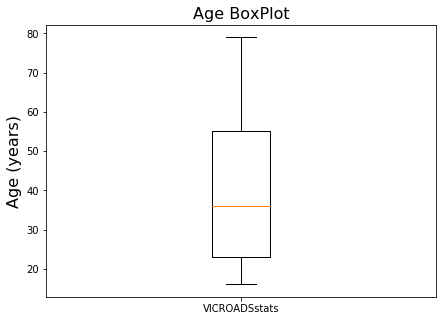

In [155]:
# INSERT YOUR CODE HERE
# code sourced from pracs
X = data_dict['Age']

fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 14})
ax.boxplot(X, 0, labels=['VICROADSstats'])
ax.set_ylabel('Age (years)', fontsize=16)
ax.set_title('Age BoxPlot', fontsize=16)

In [156]:
# INSERT YOUR COMMENT HERE

# The mean is the average of all of the ages so it is the  
# sum of all the ages divided by the number of data values
# where as the median is the middle number of the set so
# for age it is 36 if you write down all the values and 
# count them one by one until you get to the number at 
# the middle of the data set.

---
## **Instruction 3**
The following code segment is designed to examine data from the **Road_User** column. This column provides information about the types of road users involved in road accidents.


**Your tasks**:

1. Write your code to find and print out the number of **unique** road user types. (**2 marks**)
2. Write your code to find and print out the list of road user types that appear more than **16000** times in the dataset. (**2 marks**)
3. Write your code to find and print out the road user type with highest occurrence of accidents. Both the road user type and the number of accidents for the road user type need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable: ***accidents_by_road_user*** whose keys are unique road user types and values are the corresponding counts computed from the dataset. Print the dictionary. (**2 marks**)
5. Plot a bar chart for ***accidents_by_road_user*** sorted in descending order of values. (**2 marks**)

[**Total mark: 10**]

In [230]:
# INSERT YOUR CODE HERE 
# code sourced from pracs
x = data_dict['Road_User']
unpique_user_types = 0

for i in np.unique(x):
    unpique_user_types += 1
    
print(unpique_user_types)


6


In [227]:
# INSERT YOUR CODE HERE 
# code sourced from https://stackoverflow.com/questions/48371856/count-the-number-of-occurrences-of-a-certain-value-in-a-dictionary-in-python
a = sum(map(('DRIVER').__eq__, data_dict['Road_User']))
b = sum(map(('PEDESTRIAN').__eq__, data_dict['Road_User']))
c = sum(map(('MOTORCYCLIST').__eq__, data_dict['Road_User']))
d = sum(map(('PASSENGER').__eq__, data_dict['Road_User']))
e = sum(map(('BICYCLIST').__eq__, data_dict['Road_User']))
f = sum(map(('UNKNOWN').__eq__, data_dict['Road_User']))
print("Road user types that appear more than 16000 times: ")
if a > 16000:
    print('DRIVER')
if b > 16000:
    print('PEDESTRIAN')
if c > 16000:
    print('MOTORCYCLIST')
if d > 16000:
    print('PASSANGER')
if e > 16000:
    print('BICYCLIST')
if f > 16000:
    print('UNKNOWN')

Road user types that appear more than 16000 times: 
DRIVER
MOTORCYCLIST
PASSANGER


In [226]:
# INSERT YOUR CODE HERE 
# code sourced from https://stackoverflow.com/questions/46622640/how-to-find-the-most-frequent-key-in-a-dictionary-and-then-the-most-frequent-va/46622700#46622700?newreg=320234d9bc7f40539f5d3539bfe7ee78
x = data_dict['Road_User']
from statistics import mode
mc = mode(x)
a = sum(map((mc).__eq__, data_dict['Road_User']))
print("Most common road user: ", mc)
print("With",a,"Occurances")

Most common road user:  DRIVER
With 53000 Occurances


In [225]:
# INSERT YOUR CODE HERE 
a = sum(map(('DRIVER').__eq__, data_dict['Road_User']))
b = sum(map(('PEDESTRIAN').__eq__, data_dict['Road_User']))
c = sum(map(('MOTORCYCLIST').__eq__, data_dict['Road_User']))
d = sum(map(('PASSENGER').__eq__, data_dict['Road_User']))
e = sum(map(('BICYCLIST').__eq__, data_dict['Road_User']))
f = sum(map(('UNKNOWN').__eq__, data_dict['Road_User']))

accidents_by_road_user_dictionary = {"DRIVER": a,"PASSANGER": d,"PEDESTRIAN": b,"MOTORCYCLIST": c,"UNKNOWN": f,"BICYCLIST": e,}
print ("Dictionary (key-value) : ") 
for i in accidents_by_road_user_dictionary : 
    print(i, accidents_by_road_user_dictionary[i]) 

Dictionary (key-value) : 
DRIVER 53000
PASSANGER 22543
PEDESTRIAN 12544
MOTORCYCLIST 18474
UNKNOWN 2704
BICYCLIST 6276


[Text(0, 0, 'DRIVER'),
 Text(0, 0, 'PASSANGER'),
 Text(0, 0, 'PEDESTRIAN'),
 Text(0, 0, 'MOTORCYCLIST'),
 Text(0, 0, 'UNKNOWN'),
 Text(0, 0, 'BICYCLIST')]

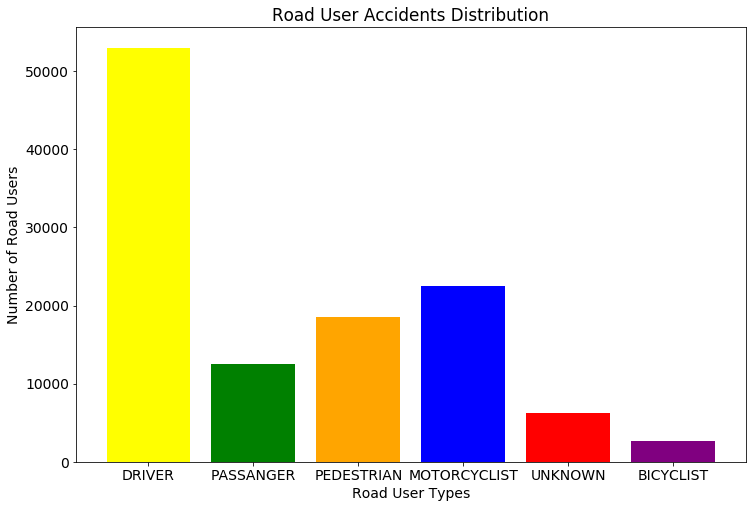

In [224]:
# INSERT YOUR CODE HERE 
a = sum(map(('DRIVER').__eq__, data_dict['Road_User']))
b = sum(map(('PEDESTRIAN').__eq__, data_dict['Road_User']))
c = sum(map(('MOTORCYCLIST').__eq__, data_dict['Road_User']))
d = sum(map(('PASSENGER').__eq__, data_dict['Road_User']))
e = sum(map(('BICYCLIST').__eq__, data_dict['Road_User']))
f = sum(map(('UNKNOWN').__eq__, data_dict['Road_User']))

accidents_by_road_user_dictionary = {"DRIVER": a,"PASSANGER": d,"PEDESTRIAN": b,"MOTORCYCLIST": c,"UNKNOWN": f,"BICYCLIST": e,}


################################################################################################################################
labels = (accidents_by_road_user_dictionary)
colours = ['yellow', 'green', 'orange','blue','red','purple']

Road_User_freq = (a,b,c,d,e,f)
x_pos = np.arange(len(Road_User_freq))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x_pos, Road_User_freq, color=colours, align='center')

ax.set_xlabel("Road User Types")
ax.set_ylabel("Number of Road Users")
ax.set_title("Road User Accidents Distribution")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

---
## **Instruction 4**
We shall further examine statistics of the road accidents in the dataset. 
**Your tasks here are:**
1. Write your code to print the number of males and females involved in accidents in the dataset. (**3 marks**)
2. Write your code to create indices of records for males and females in the dataset (**2 marks**)
3. Write your code to plot a histogram of number of accidents by age for females and males separately. Use 10-year bins. Plot both distributions on the same plot. (**2 marks**)
4. Briefly describe the meaning of the obtained results. (**3 marks**)

[**Total mark: 10**]

In [223]:
#INSERT YOUR CODE HERE
m = sum(map(('MALE').__eq__, data_dict['Gender']))
f = sum(map(('FEMALE').__eq__, data_dict['Gender']))

print("Number of Males involved:",m ,"|"" Number of Females involved:",f)


Number of Males involved: 66310 | Number of Females involved: 49173


In [222]:
#INSERT YOUR CODE HERE
#code sourced from https://thispointer.com/python-find-duplicates-in-a-list-with-frequency-count-index-positions/
x = data_dict['Gender']
listOfElems = x

def getDuplicatesWithInfo(listOfElems):
    ''' Get duplicate element in a list along with thier indices in list
     and frequency count'''
    dictOfElems = dict()
    index = 0
    for elem in listOfElems:
        if elem in dictOfElems:
            dictOfElems[elem][0] += 1
            dictOfElems[elem][1].append(index)
        else:
            dictOfElems[elem] = [1, [index]]
        index += 1    
 
    dictOfElems = { key:value for key, value in dictOfElems.items() if value[0] > 1}
    return dictOfElems

dictOfElems = getDuplicatesWithInfo(listOfElems)
 
for key, value in dictOfElems.items():
        print('Element =', key , '> Indicies Positions =  ', value[1])  

Element = MALE > Indicies Positions =   [0, 1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 31, 33, 34, 35, 36, 38, 41, 42, 44, 45, 46, 48, 49, 51, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 69, 70, 72, 73, 77, 78, 80, 82, 86, 87, 89, 90, 91, 93, 95, 97, 99, 101, 102, 103, 104, 105, 106, 108, 111, 112, 116, 118, 126, 127, 128, 132, 133, 134, 135, 136, 138, 139, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 161, 162, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 178, 179, 180, 185, 186, 189, 190, 192, 194, 195, 196, 199, 201, 202, 205, 209, 210, 211, 213, 214, 218, 219, 222, 223, 227, 230, 231, 232, 234, 237, 238, 239, 240, 242, 243, 244, 246, 247, 249, 250, 251, 252, 253, 258, 259, 260, 261, 265, 267, 268, 269, 270, 272, 274, 276, 283, 284, 285, 288, 289, 292, 293, 294, 295, 296, 297, 298, 301, 304, 306, 307, 309, 310, 311, 312, 313, 314, 316, 318, 319, 322, 323, 325, 327, 328, 329, 330, 333, 338, 340, 341, 343, 344, 346, 349, 350, 3

Text(0.5, 1.0, 'Histogram of Age in accidents, males vs females')

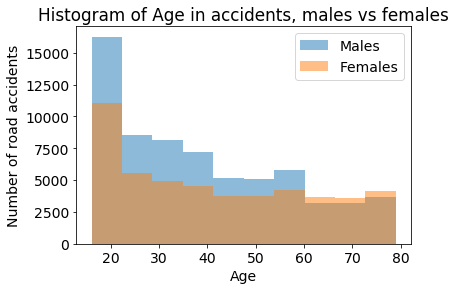

In [221]:
#INSERT YOUR CODE HERE
# code sourced from lecture 4 resources 
x = data_dict['Gender']
#Gender = data_dict['Gender']
Age = data_dict['Age']
Crash_F = Age[np.where(x == 'FEMALE')]
Crash_M = Age[np.where(x == 'MALE')]
plt.hist(Crash_M,label='Males',alpha=0.5, bins=10)
plt.hist(Crash_F,label='Females',alpha=0.5, bins=10)
plt.legend()
plt.xlabel('Age') 
plt.ylabel('Number of road accidents')
plt.title('Histogram of Age in accidents, males vs females')

In [220]:
#INSERT YOUR COMMENT HERE
# The results show a positevly skewed. It shows that younger individuals are more likely to be involved in a 
# road accident, it also shows us that more males have been involved in an
# accident than a female especially in the younger years with there being more females
# involved after the 60 years old mark 

---
## **Instruction 5**

**Your tasks**:

1. Define a function called **compute_time_day_year** that takes Year, Crash_Month, Crash_Day and Crash_Time as the inputs and returns day of week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday), time of the day (Morning - 06:00-11:59, Afternoon - 12:00-17:59, Evening - 18:00-23:59, Night - 00:00 - 05:59), and season of the year (Winter for June, July and August; Spring for September, October, November; Summer for December, January, February; Autumn for March, April, May). If either of the input parameters is in incorrect form, the function returns `INVALID` in all outputs.  (**4 marks**)
2. Write your code to calculate an array containing the day of week, the time of the day and the season of the year for all accident records. Print the first 10 entries in the array. (**2 marks**)
3. Construct a new array called **valid_DTS_list** to store only valid entries and then print out the number of elements in the array. (**3 marks**)
4. Compute the accident numbers for each of the days of week in the dataset and plot them as a bar chart. Also, print minimum, maximum, mean and median of the computed accident numbers. (**1 mark**)
5. Compute the accident numbers for each of the seasons (Summer, Autumn, Winter, Spring) in the dataset and plot them as a bar chart. (**1 mark**)
6. Compute the accident numbers with Injury_Severity equal to 1 for each of the times of the day (Morning, Afternoon, Evening, Night) in the dataset and plot them as a bar chart. (**1 mark**)
7. Why is the median of the accident numbers integer and the mean is not? Write a brief answer. (**3 marks**)

[**Total mark: 15**]

In [219]:
# INSERT YOUR CODE HERE
# code sourced from https://pythontic.com/datetime/date/weekday
# https://stackoverflow.com/questions/311627/how-to-print-a-date-in-a-regular-format
# code sourced from pracs

def compute_time_day_year(Year,Crash_Month,Crash_Day,Crash_Time):
    if Crash_Month > 12 or Crash_Day >31 or Crash_Time >240000:
        Crash_Day = 'INVALID'
        Crash_Time = 'INVALID'
        Year = 'INVALID'
        Crash_Month = 'INVALID'

        return Year,Crash_Month,Crash_Day,Crash_Time
        
    else:
        Week_Days = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
        
        Input = datetime.date(Year,Crash_Month,Crash_Day)
        
        Input_Day = Input.weekday()
        Input_Day_txt = Week_Days[Input_Day]
        
        print(Input_Day_txt)
         
        autumn = range(3,5)
        winter = range(6,8)
        spring = range(9,11)
        if   Crash_Month in autumn : season = 'Autumn'
        elif Crash_Month in winter : season = 'Winter'
        elif Crash_Month in spring : season = 'Spring'
        elif Crash_Month in summer : season = 'Summer'
        
        print(season)
        
        
            #Early_Morning = range(40000,80000)
            #Morning = range(80001,120000)
            #Noon = range(120001,160000)
            #Eve = range(160001,200000)
            #Night = range(200001,240000)
            #if Crash_Time in Early_Morning :Crash_Time = 'Early Morning'
            #elif Crash_Time in Morning : Crash_Time = 'Morning'
            #elif Crash_Time in Noon : Crash_Time = 'Noon'
            #elif Crash_Time in Eve : Crash_Time = 'Eve'
            #elif Crash_Time in Night : Crash_Time = 'Night'
            
        if (Crash_Time > 40000) and (Crash_Time <= 80000) : return ("Early Morning") 
        elif (Crash_Time > 80000) and (Crash_Time <= 120000) : return ("Morning")
        elif (Crash_Time > 120000) and (Crash_Time <= 160000) : return ("Noon")
        elif (Crash_Time > 160000) and (Crash_Time <= 200000) : return ("Eve")
        elif (Crash_Time > 200000) and (Crash_Time <= 240000) : return ("Night")
        elif (Crash_Time <= 400) : return 'Late Night'
        
        print(Crash_Time)
        
        
        print(Input_Day_txt,Crash_Time,season)

compute_time_day_year(2002,4,10,240000)



Wednesday
Autumn


'Night'

In [207]:
# INSERT YOUR CODE HERE
# code sourced from https://pythontic.com/datetime/date/weekday

def compute_time_day_year(Year,Crash_Month,Crash_Day,Crash_Time):
        Y = np.array(data_dict['Year'])
        CM = np.array(data_dict['Crash_Month'])
        CD = np.array(data_dict['Crash_Day'])
        CT = data_dict['Crash_Time']
    
    if Crash_Month > 12 or Crash_Day >31 or Crash_Time >240000:
        Crash_Day = 'INVALID'
        Crash_Time = 'INVALID'
        Year = 'INVALID'
        Crash_Month = 'INVALID'

        return Year,Crash_Month,Crash_Day,Crash_Time
        
    else:
        Week_Days = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
        
        Input = datetime.date(Y,CM,CD)
        
        Input_Day = Input.weekday()
        Input_Day_txt = Week_Days[Input_Day]
        
        print(Input_Day_txt)
         
        autumn = range(3,5)
        winter = range(6,8)
        spring = range(9,11)
        if   Crash_Month in autumn : season = 'Autumn'
        elif Crash_Month in winter : season = 'Winter'
        elif Crash_Month in spring : season = 'Spring'
        elif Crash_Month in summer : season = 'Summer'
        
        print(season)
        
        
            #Early_Morning = range(40000,80000)
            #Morning = range(80001,120000)
            #Noon = range(120001,160000)
            #Eve = range(160001,200000)
            #Night = range(200001,240000)
            #if Crash_Time in Early_Morning :Crash_Time = 'Early Morning'
            #elif Crash_Time in Morning : Crash_Time = 'Morning'
            #elif Crash_Time in Noon : Crash_Time = 'Noon'
            #elif Crash_Time in Eve : Crash_Time = 'Eve'
            #elif Crash_Time in Night : Crash_Time = 'Night'
            
        if (Crash_Time > 40000) and (Crash_Time <= 80000) : return ("Early Morning") 
        elif (Crash_Time > 80000) and (Crash_Time <= 120000) : return ("Morning")
        elif (Crash_Time > 120000) and (Crash_Time <= 160000) : return ("Noon")
        elif (Crash_Time > 160000) and (Crash_Time <= 200000) : return ("Eve")
        elif (Crash_Time > 200000) and (Crash_Time <= 240000) : return ("Night")
        elif (Crash_Time <= 400) : return 'Late Night'
        
        print(Crash_Time)
        
        
        print(Input_Day_txt,Crash_Time,season)

compute_time_day_year(Y[2],CM[6],CD[10],170000)

TypeError: only size-1 arrays can be converted to Python scalars

In [218]:
# INSERT YOUR CODE HERE

In [206]:
# INSERT YOUR CODE HERE

In [24]:
# INSERT YOUR CODE HERE

In [25]:
# INSERT YOUR CODE HERE

In [26]:
#INSERT YOUR COMMENT HERE

# The median of the accidents numbers is an integer because it is the middle number so it is a real(whole) number
# in the data set while mean is not an integer because it is has decimals as it is calculated and is not a whole 
# number.


---
## **Instruction 6**
Continue from the previous steps, **your tasks are:**

1. Write your code to find and print all the invalid entry indices. An entry is invalid if it has been marked as `INVALID` by **compute_time_day_year** function. Also print how many invalid entries are in the dataset. (**2 marks**)
2. Write your code to filter out all invalid entries and store your data into a new variable **data_dict_cleaned** and print out the number of data records after being cleaned. (**2 marks**)

3. Define a function, which takes a time string in form `%H:%M:%S` as an input and computes time in hours since 
midnight. Note that the time in hours does not have to be integer. (**3 marks**)

4.  Write your code to produce a scatter plot of age of a person involved in a car accident vs time since midnight for that accident. Use the data for year 2005 only. (**3 marks**)

[**Total mark: 10**]

In [27]:
# INSERT YOUR CODE HERE

In [28]:
# INSERT YOUR CODE HERE

In [29]:
# INSERT YOUR CODE HERE

In [30]:
# INSERT YOUR CODE HERE

## **Instruction 7**
Think about the results above. Can you tell which fields in the dataset have been tampered with? Why do you think so? (**5 marks**)

[**Total mark: 5**]

In [31]:
#INSERT YOUR COMMENT HERE

# I can tell that the data has been tampered with as you normally expect to find data that 
# is invalid or has been improparly entered. The fact that the results abouve dont show this
# data shows that this data has been removed somewhere in the process. I can also tell that the 
# fields that have been tampered with are Crash_Time which in turn removes the whole record 
# 
